## 7. Data Normalization & Feature Scaling (Feature Scaling)

Feature Scaling standardizes independent features so that they lie within a similar range.  
Important for distance-based models (KNN, SVM, k-means) and gradient-based models.

---

### 1. Standardization (StandardScaler)
- Formula: z = (X - mean) / std
- Centers data at 0, std = 1
- **Use:** Most ML models; sensitive to outliers

**Code:**
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = scaler.fit_transform(df)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sp=pd.read_csv("data/50_Startups.csv")
sp.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
7,130298.13,145530.06,323876.68,Florida,155752.60
0,165349.20,136897.80,471784.10,New York,192261.83
15,114523.61,122616.84,261776.23,New York,129917.04
21,78389.47,153773.43,299737.29,New York,111313.02
20,76253.86,113867.30,298664.47,California,118474.03
2,153441.51,101145.55,407934.54,Florida,191050.39
42,23640.93,96189.63,148001.11,California,71498.49
39,38558.51,82982.09,174999.30,California,81005.76
25,64664.71,139553.16,137962.62,California,107404.34
45,1000.23,124153.04,1903.93,New York,64926.08


In [5]:
sp_copy=sp.drop("State", axis=1).copy()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(sp_copy)

sp_scaled=scaler.transform(sp_copy)

sp_df=pd.DataFrame(sp_scaled, columns=sp_copy.columns)


In [7]:
sp_df.sample()

,R&D Spend,Administration,Marketing Spend,Profit
46,-1.593413,-0.199322,0.711122,-1.566922


In [8]:
np.round(sp_df.describe(), 1)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0,50.0,50.0,50.0
mean,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.6,-2.5,-1.7,-2.4
25%,-0.7,-0.6,-0.7,-0.5
50%,-0.0,0.0,0.0,-0.1
75%,0.6,0.8,0.7,0.7
max,2.0,2.2,2.2,2.0


Text(0.5, 1.0, 'After scaling')

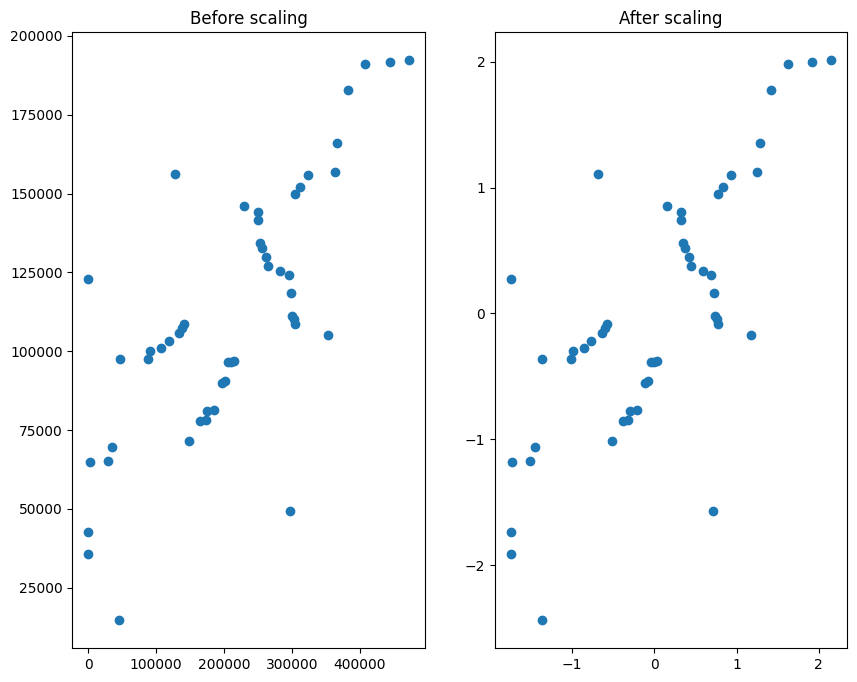

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(sp["Marketing Spend"], sp["Profit"])
plt.title("Before scaling")
plt.subplot(122)
plt.scatter(sp_df["Marketing Spend"], sp_df["Profit"])
plt.title("After scaling")

<Axes: ylabel='Density'>

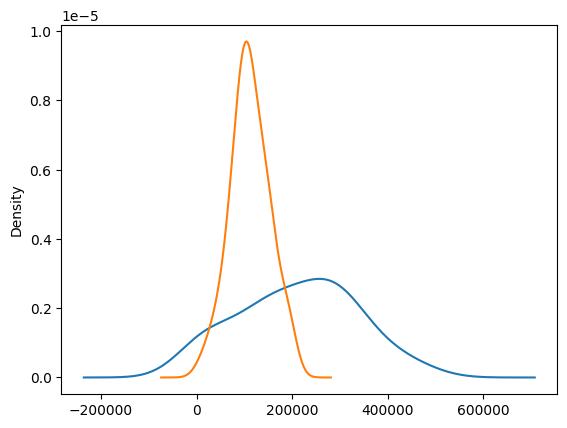

In [10]:
sp["Marketing Spend"].plot(kind="kde", label="Market spend")
sp["Profit"].plot(kind="kde", label="Profit")

<Axes: ylabel='Density'>

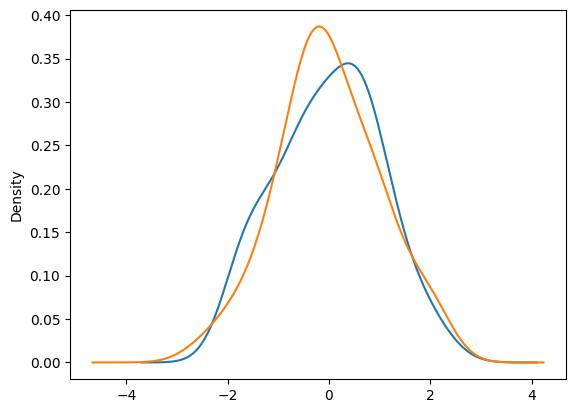

In [11]:
sp_df["Marketing Spend"].plot(kind="kde", label="Market spend")
sp_df["Profit"].plot(kind="kde", label="Profit")

### Why Scaling is important?

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(sp.drop(["Profit","State"], axis=1), sp["Profit"], test_size=0.2)

In [13]:
x_train.shape, x_test.shape

((40, 3), (10, 3))

In [14]:
x_train.head()

,R&D Spend,Administration,Marketing Spend
48,542.05,51743.15,0.00
13,91992.39,135495.07,252664.93
0,165349.20,136897.80,471784.10
6,134615.46,147198.87,127716.82
1,162597.70,151377.59,443898.53


In [15]:
scale=StandardScaler()
scale.fit(x_train)

x_train_scaled= pd.DataFrame(scale.transform(x_train), columns=x_train.columns)
x_test_scaled=pd.DataFrame(scale.transform(x_test), columns=x_test.columns)

In [16]:
lr=LinearRegression()
lr_scaled=LinearRegression()

In [17]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [18]:
print("Actual:", mean_squared_error(y_test, y_pred))
print("Scaled:", mean_squared_error(y_test, y_pred_scaled))

Actual: 50625266.06790284
Scaled: 50625266.06790286


## Normalization 
Normalization is a technique often applied as part of data preparation for machine learning. THe goal of normalization is to change the values of numeric columns in the data to use a common scale, without distorting differences in the range of values or losing information.


### 2. Min-Max Scaling
- Formula: X_scaled = (X - X_min) / (X_max - X_min)  
- Transforms data to **range [0, 1]** (or any fixed range)  
- **Use when:** Need bounded values, e.g., for neural networks  
- **Sensitive to outliers:** Yes, extreme values can shrink most of the data

**Code:**
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_standard = scaler.fit_transform(df)


In [19]:
from sklearn.preprocessing import MinMaxScaler


np.random.seed(42)  # for reproducibility

data = pd.DataFrame({
    "Height_cm": np.random.normal(loc=170, scale=10, size=100),
    "Weight_kg": np.random.normal(loc=65, scale=12, size=100)
})

data.head()

,Height_cm,Weight_kg
0,174.967142,48.015551
1,168.617357,59.952256
2,176.476885,60.887426
3,185.230299,55.372673
4,167.658466,63.064571


In [20]:
data.describe()

,Height_cm,Weight_kg
count,100.000000,100.000000
mean,168.961535,65.267655
std,9.081684,11.444028
min,143.802549,41.974745
25%,163.990943,55.332074
50%,168.730437,66.009286
75%,174.059521,71.458045
max,188.522782,97.642030


<Axes: ylabel='Density'>

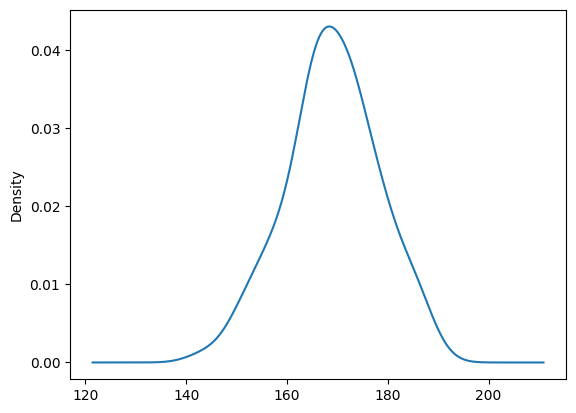

In [21]:
data["Height_cm"].plot(kind="kde")

In [22]:
scalar= MinMaxScaler()

scalar.fit(data)

data_scaled= pd.DataFrame(scalar.transform(data), columns=["Height", "weight"])

Text(0.5, 1.0, 'After scaling')

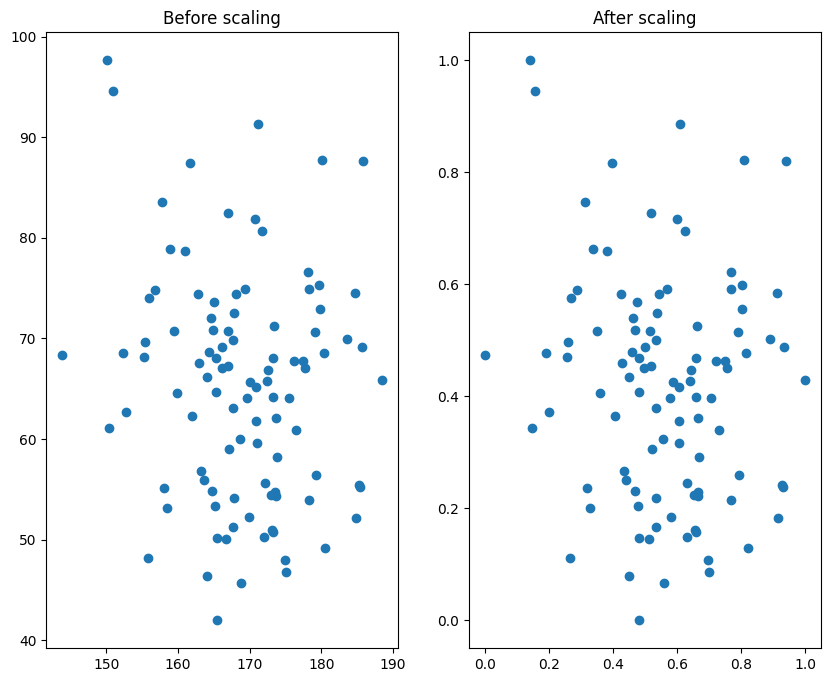

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data["Height_cm"], data["Weight_kg"])
plt.title("Before scaling")
plt.subplot(122)
plt.scatter(data_scaled["Height"], data_scaled["weight"])
plt.title("After scaling")

### 3. Robust Scaling
- Formula: X_scaled = (X - median) / IQR  
- Uses **median and interquartile range** instead of mean/std  
- **Use when:** Data contains **outliers**  
- **Effect:** Reduces influence of extreme values, preserves robust spread

**Code:**
```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_standard = scaler.fit_transform(df)


### Mean Normalization
- Formula: X_scaled = (X - mean) / (X_max - X_min)
- Centers data around 0 with values roughly in [-1, 1]
- **Use when:** You want to remove mean and scale features to a similar range
- **Sensitive to outliers:** Yes, extreme values can affect min/max

---

### MaxAbs Scaling
- Formula: X_scaled = X / max(|X|)
- Scales each feature to the range [-1, 1] without centering
- **Use when:** Data is already centered at 0 or sparse (e.g., sparse matrices)
- **Robustness:** Less affected by zero entries; still sensitive to extreme values


In [24]:
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'A':[10, 20, 30, 100], 'B':[1, 2, 3, 4]})

# -----------------
# Mean Normalization
# -----------------
df_mean_norm = (df - df.mean()) / (df.max() - df.min())
print("Mean Normalization:")
print(df_mean_norm)

# -----------------
# MaxAbs Scaling
# -----------------
scaler = MaxAbsScaler()
df_maxabs = scaler.fit_transform(df)
print("\nMaxAbs Scaling:")
print(df_maxabs)

Mean Normalization:
          A         B
0 -0.333333 -0.500000
1 -0.222222 -0.166667
2 -0.111111  0.166667
3  0.666667  0.500000

MaxAbs Scaling:
[[0.1  0.25]
 [0.2  0.5 ]
 [0.3  0.75]
 [1.   1.  ]]


## Normalization vs Standardization

| Aspect                | Normalization (Min-Max)                       | Standardization (Z-score)                      |
|----------------------|-----------------------------------------------|-----------------------------------------------|
| **Definition**       | Scales data to a **fixed range** [0,1]       | Centers data at 0 with **std = 1**           |
| **Formula**          | X_scaled = (X - X_min) / (X_max - X_min)     | z = (X - mean) / std                          |
| **Effect on distribution** | Does not change shape of distribution      | Does not bound data; preserves outliers      |
| **Sensitive to outliers?** | Yes                                         | Yes, unless using RobustScaler               |
| **Use case**         | Neural networks, distance-based models needing bounded input | Algorithms assuming normal distribution or sensitive to scale |

---

### **When to use Standardization**
- **Algorithms sensitive to feature scale:**  
  - **Linear models:** Linear Regression, Logistic Regression  
  - **Distance-based models:** KNN, SVM, k-means clustering  
  - **Gradient-based optimization:** Neural networks, Gradient Boosting  

- **Algorithms not sensitive to scale:**  
  - Tree-based models (Decision Tree, Random Forest, XGBoost) → usually **do not need scaling**  

  ---

### **Use Normalization When:**
1. **Neural Networks / Deep Learning**  
   - Inputs should be bounded to improve **gradient convergence**.
2. **Distance-Based Models**  
   - KNN, K-Means, or any algorithm using **distance metrics** (Euclidean, Manhattan)  
   - Prevents features with larger scales from dominating.
3. **When feature ranges differ significantly**  
   - Ensures all features contribute **equally** to the model.
4. **Input for bounded activation functions**  
   - Sigmoid / Tanh layers work better when inputs are scaled to [0,1] or [-1,1].

---

### **Avoid Normalization When:**
- Data contains **outliers** → Min-Max scaling can compress most values into a tiny range.  
- Tree-based models (Decision Tree, Random Forest, XGBoost) → **not needed**, as these models are **scale-invariant**.

**Key Point:**  
> Use Standardization when **features have different scales**, especially for models relying on **distance or gradient optimization**. Use Normalization when **bounded input is required**, e.g., neural networks or [0,1] features.
